# Demonstration of Interatomic Potential Testing Framework

**James Kermode**
<br>
March 2021

Data and code available from https://github.com/libAtoms/testing-framework


In [1]:
import itertools
import json
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nglview

from ase.io import read

sns.set_context('talk')

os.chdir(os.path.expanduser('../example_models/In2O3/run_dir/'))
! [[ ! -d ../tests ]] && ln -s ~/tests/Si ../tests

ln: failed to create symbolic link '../tests': File exists


In [2]:
!source ~/.zshrc

In [12]:
!pwd

/home/lls34/GitHub/01_PhD/PhD_Code/submodules/testing-framework/testing-framework/example_models/In2O3/run_dir


In [13]:
 !python ../../../scripts/run-model-test.py  -Nl In2O3 GAP_it1_50s ../../../../tests/In2O3/phonons_In2O3_Ia3

share_dir /home/lls34/GitHub/01_PhD/PhD_Code/submodules/testing-framework/testing-framework/scripts/../share

###### START RUN Tue May 18 15:21:07 2021 ######
Model GAP_it1_50s, Test phonons_In2O3_Ia3
Test run at 2021-05-18 15:21

model file: ../../models/GAP_it1_50s/model.py
from quippy.potential import Potential
import os

model_dir = os.path.dirname(os.path.realpath(__file__))
gap_xml = os.path.join(model_dir, "gap_fit/gap.xml")

print(f"Gap Fit : using gap.xml from {gap_xml}")
calculator = Potential(param_filename=gap_xml)

name = "GAP_it1_50s"
no_checkpoint = True
test file: ../../../../tests/In2O3/phonons_In2O3_Ia3/test.py
from phonons import *

properties = do_phonons(["bulk_In2O3_Ia3"], n_supercell=3, band_paths=["GXKGL"])
Gap Fit : using gap.xml from /home/lls34/GitHub/01_PhD/PhD_Code/submodules/testing-framework/testing-framework/example_models/In2O3/models/GAP_it1_50s/gap_fit/gap.xml
SETUP
Creating 11 displacements
CALCULATE
Calculating for 11 displacements
^C
Traceback (mos

In [15]:
#!python ../../../scripts/run-model-test.py -Nl In2O3 GAP_it1_50s ../../../../tests/In2O3/bulk_In2O3_Ia3
#!python ../../../scripts/run-model-test.py -Nl In2O3 GAP_it1_50s ../../../../tests/In2O3/bulk_In2O3_Pbca
#!python ../../../scripts/run-model-test.py -Nl In2O3 GAP_it1_50s ../../../../tests/In2O3/bulk_In2O3_Pbcn
!python ../../../scripts/run-model-test.py -Nl In2O3 GAP_it1_50s ../../../../tests/In2O3/bulk_In2O3_R3c

share_dir /home/lls34/GitHub/01_PhD/PhD_Code/submodules/testing-framework/testing-framework/scripts/../share

###### START RUN Tue May 18 15:21:55 2021 ######
Model GAP_it1_50s, Test bulk_In2O3_Pbca
Test run at 2021-05-18 15:21

model file: ../../models/GAP_it1_50s/model.py
from quippy.potential import Potential
import os

model_dir = os.path.dirname(os.path.realpath(__file__))
gap_xml = os.path.join(model_dir, "gap_fit/gap.xml")

print(f"Gap Fit : using gap.xml from {gap_xml}")
calculator = Potential(param_filename=gap_xml)

name = "GAP_it1_50s"
no_checkpoint = True
test file: ../../../../tests/In2O3/bulk_In2O3_Pbca/test.py
import os.path
import lattice

# The primitive unit cell was used for this
properties = lattice.do_lattice(
    os.path.abspath(os.path.dirname(__file__)), "orthorhombic"
)
Gap Fit : using gap.xml from /home/lls34/GitHub/01_PhD/PhD_Code/submodules/testing-framework/testing-framework/example_models/In2O3/models/GAP_it1_50s/gap_fit/gap.xml
relax bulk
relax_config fai

In [9]:
/home/lls34/GitHub/01_PhD/PhD_Code/submodules/testing-framework/testing-framework/tests/In2O3/bulk_In2O3_Ia3

SyntaxError: invalid decimal literal (<ipython-input-9-e2cf529b0a49>, line 1)

In [13]:
import quippy

ImportError: /opt/womble/QUIP/latest/linux_x86_64_gfortran/_quippy.so: undefined symbol: _Py_FatalErrorFunc

## Energy-Volume curves

We can read in the existing data:

In [ ]:
def read_data(model_names):
    data = {}
    for model_name in model_names:
        json_file = f"Si-model-{model_name}-test-bulk_Si_diamond-properties.json"
        model_name = os.path.basename(json_file).split('-')[2]
        data[model_name] = json.load(open(json_file))
    return data
    
data = read_data(['CASTEP_ASE', 'GAP'])
ref_model_name = 'CASTEP_ASE'

Now we define some simple functions to plot energy volume curves for the reference DFT and GAP models. Here we fit a quartic polynomial to the data.

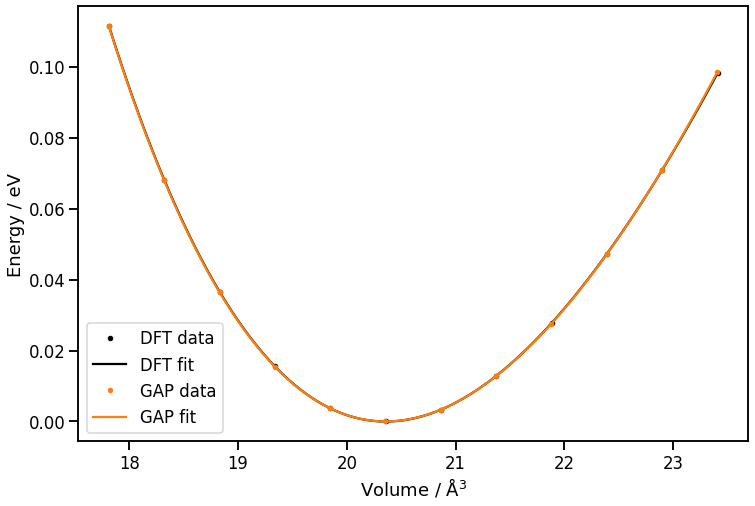

In [84]:
def polyplot(ax, V, E, color, label):
    p = np.polyfit(V, E - E.min(), 4)
    v = np.linspace(V.min(), V.max(), 100)
    e = np.polyval(p, v)
    ax.plot(V, E - E.min(), color+'.', label=label+' data')
    ax.plot(v, e, color+'-', label=label+' fit')

def plot_e_vs_v(all_data, ref_model_name, colors=None):
    ref_data = all_data[ref_model_name]
    ref_E_vs_V = np.array(ref_data['E_vs_V'])
    fig, ax = plt.subplots(figsize=(12,8))
    polyplot(ax, ref_E_vs_V[:,0], ref_E_vs_V[:,1], 'k', 'DFT')
    
    if colors is None:
        colors = itertools.cycle(['C0', 'C1', 'C2', 'C3', 'C4'])

    for model_name, color in zip(all_data, colors):
        if model_name == ref_model_name:
            continue
        data = all_data[model_name]
        E_vs_V = np.array(data['E_vs_V'], dtype=object)
        V = E_vs_V[:, 0].astype(float)
        E = E_vs_V[:, 1].astype(float)
        polyplot(ax, V, E - E.min(), color, model_name)        
        

    ax.set_xlabel(r'Volume / $\mathrm{\AA}^3$')
    ax.set_ylabel('Energy / eV')
    plt.legend()
    
plot_e_vs_v(data, ref_model_name)